In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from arch import arch_model
sns.set()

In [2]:
data = pd.read_excel("hw_7_data.xlsx").rename(columns={"Unnamed: 0": "Date"}).set_index("Date")
data.head(5)

,SPY US Equity,AAPL US Equity,CL1 Comdty,DXY Curncy,HFRIMTI Index,Rate Convexity,Portfolio,10-yr Yields,Dvd-Price Ratio
Date,,,,,,,,,
1999-10-31,0.064078,0.265523,-0.112607,0.005277,0.0235,0.025013,0.000072,0.06024,0.010868
1999-11-30,0.016651,0.221519,0.130575,0.029578,0.0250,0.027722,0.105636,0.06191,0.010690
1999-12-31,0.057089,0.050465,0.041074,-0.001177,0.0509,0.040543,0.042261,0.06442,0.009465
2000-01-31,-0.049787,0.009123,0.079687,0.032002,0.0155,0.034617,0.031966,0.06665,0.009961
2000-02-29,-0.015226,0.104820,0.100941,0.007515,0.0596,-0.038410,0.063138,0.06409,0.010792


# 1. Forecast Regressions

In [3]:
y = data['SPY US Equity']

## 1.1.a

In [4]:
X = sm.add_constant(data['Dvd-Price Ratio']).shift(1)
model1 = sm.OLS(y,X,missing='drop').fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          SPY US Equity   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     2.683
Date:                Thu, 08 Jul 2021   Prob (F-statistic):              0.103
Time:                        21:38:14   Log-Likelihood:                 419.10
No. Observations:                 238   AIC:                            -834.2
Df Residuals:                     236   BIC:                            -827.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0140      0.012     -1.139      0.256      -0.038       0.010
Dvd-Price Ratio     1.0678      0.652      1.638      0.103      -0.217       2.352
==============================================================================
Omnibus:                       24.604   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.009
Skew:                          -0.660   Prob(JB):                     2.50e-08
Kurtosis:                       4.337   Cond. No.                         241.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 1.1.b

In [5]:
X = sm.add_constant(data['10-yr Yields']).shift(1)
model2 = sm.OLS(y,X,missing='drop').fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          SPY US Equity   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     6.544
Date:                Thu, 08 Jul 2021   Prob (F-statistic):             0.0112
Time:                        21:38:14   Log-Likelihood:                 421.01
No. Observations:                 238   AIC:                            -838.0
Df Residuals:                     236   BIC:                            -831.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0246      0.008      3.119      0.002       0.009       0.040
10-yr Yields    -0.5483      0.214     -2.558      0.011      -0.971      -0.126
==============================================================================
Omnibus:                       17.307   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.248
Skew:                          -0.529   Prob(JB):                     1.48e-05
Kurtosis:                       4.060   Cond. No.                         79.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 1.1.c

In [6]:
X = sm.add_constant(data[['Dvd-Price Ratio','10-yr Yields']]).shift(1)
model3 = sm.OLS(y,X,missing='drop').fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          SPY US Equity   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     3.258
Date:                Thu, 08 Jul 2021   Prob (F-statistic):             0.0402
Time:                        21:38:14   Log-Likelihood:                 421.01
No. Observations:                 238   AIC:                            -836.0
Df Residuals:                     235   BIC:                            -825.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0249      0.023      1.065      0.288      -0.021       0.071
Dvd-Price Ratio    -0.0127      0.853     -0.015      0.988      -1.693       1.667
10-yr Yields       -0.5510      0.283     -1.950      0.052      -1.108       0.006
==============================================================================
Omnibus:                       17.233   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.121
Skew:                          -0.528   Prob(JB):                     1.57e-05
Kurtosis:                       4.057   Cond. No.                         325.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 1.2.a

In [7]:
y = data['Dvd-Price Ratio']
X = sm.add_constant(data['Dvd-Price Ratio']).shift(1)
model4 = sm.OLS(y,X,missing='drop').fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Dvd-Price Ratio   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     935.4
Date:                Thu, 08 Jul 2021   Prob (F-statistic):           4.56e-84
Time:                        21:38:14   Log-Likelihood:                 1159.7
No. Observations:                 238   AIC:                            -2315.
Df Residuals:                     236   BIC:                            -2309.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0021      0.001      3.846      0.000       0.001       0.003
Dvd-Price Ratio     0.8876      0.029     30.585      0.000       0.830       0.945
==============================================================================
Omnibus:                       23.824   Durbin-Watson:                   1.864
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.805
Skew:                          -0.055   Prob(JB):                     1.06e-23
Kurtosis:                       6.265   Cond. No.                         241.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
y = data['10-yr Yields']
X = sm.add_constant(data['10-yr Yields']).shift(1)
model5 = sm.OLS(y,X,missing='drop').fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           10-yr Yields   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     5523.
Date:                Thu, 08 Jul 2021   Prob (F-statistic):          1.01e-165
Time:                        21:38:14   Log-Likelihood:                 1085.7
No. Observations:                 238   AIC:                            -2167.
Df Residuals:                     236   BIC:                            -2160.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0007      0.000      1.353      0.177      -0.000       0.002
10-yr Yields     0.9756      0.013     74.319      0.000       0.950       1.001
==============================================================================
Omnibus:                        8.760   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.013   Jarque-Bera (JB):               16.652
Skew:                           0.017   Prob(JB):                     0.000242
Kurtosis:                       4.295   Cond. No.                         79.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 1.2.b

We see that for both the Dividend Ratio and the 10-yr Yield, the R-squared is large and the beta is close to 1 and statistically significant.

One of the assumptions for the classic OLS results, (the Gauss-Markov Theorem,) is that epsilon does not have serial correlation. Typically, if we use a regressor such as these two variables, with such high serial correlation, this will induce serial correlation in epsilon. Accordingly, we may not be able to trust the classic t-stats, as noted in the "Notes" of the regression tables above.

Furthermore, this high serial correlation of X means that in a regression such as that of 1(a), we may have significant small-sample bias.

Accordingly, time-series regressions where the X has high serial correlation tend to rely on large-sample properties and adjusted t-stats.

# 2. OOS R-squared

In [9]:
X = sm.add_constant(data[['Dvd-Price Ratio','10-yr Yields']]).shift(1)
y = data['SPY US Equity']
min_obv = 60

In [10]:
err_x, err_null = [], []

for i in range(min_obv, len(y)):
    currX = X.iloc[:i]
    currY = y.iloc[:i]
    model = sm.OLS(currY, currX, missing='drop').fit()
    pred = model.predict(X.iloc[[i]])[0]
    err_x.append(y.iat[i] - pred)
    err_null.append(y.iat[i] - currY.mean())
    
r_sqr_oos = 1 - np.square(err_x).sum() / np.square(err_null).sum()
r_sqr_oos

-0.018466188013065432

# 3. Time-Series Models of Volatility

In [11]:
spy = data['SPY US Equity']
garch = arch_model(spy).fit()
garch.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 92833052.22133186
Iteration:      2,   Func. Count:     17,   Neg. LLF: 1063997.6442647872
Iteration:      3,   Func. Count:     28,   Neg. LLF: 302317.4667210068
Iteration:      4,   Func. Count:     35,   Neg. LLF: -440.7194977840106
Iteration:      5,   Func. Count:     41,   Neg. LLF: -250.59297134941357
Iteration:      6,   Func. Count:     48,   Neg. LLF: -426.5000613722011
Iteration:      7,   Func. Count:     54,   Neg. LLF: -441.40217780705615
Iteration:      8,   Func. Count:     60,   Neg. LLF: -264.50527141058546
Iteration:      9,   Func. Count:     68,   Neg. LLF: -442.0670124116405
Iteration:     10,   Func. Count:     74,   Neg. LLF: -442.0688871123682
Iteration:     11,   Func. Count:     79,   Neg. LLF: -442.06918117935584
Iteration:     12,   Func. Count:     83,   Neg. LLF: -442.06918117915114
Optimization terminated successfully    (Exit mode 0)
            Current function value: -442.06918117935584
           

/Users/markhendricks/Projects/FINM/DataAnalysis/venv/lib/python3.8/site-packages/arch/univariate/base.py:316: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001756. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:          SPY US Equity   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                442.069
Distribution:                  Normal   AIC:                          -876.138
Method:            Maximum Likelihood   BIC:                          -862.233
                                        No. Observations:                  239
Date:                Thu, Jul 08 2021   Df Residuals:                      238
Time:                        21:38:15   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         9.1736e-03  1.982e-03      4.628  3.696e-06 [5.288e-03,1.306e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      8.8245e-05  4.073e-05      2.167  3.025e-02 [8.422e-06,1.681e-04]
alpha[1]       0.2199  6.464e-02      3.402  6.684e-04   [9.323e-02,  0.347]
beta[1]        0.7408  5.213e-02     14.209  8.085e-46     [  0.639,  0.843]
============================================================================

Covariance estimator: robust
"""

In [12]:
garch.params

mu          0.009174
omega       0.000088
alpha[1]    0.219919
beta[1]     0.740770
Name: params, dtype: float64

In [13]:
vol = pd.DataFrame(index=spy.index, columns=["Expanding Window", "Rolling Window", "IGARCH", "GARCH(1,1)"])

for i, t in enumerate(spy.index[59:-1]):
    vol.iloc[i+60, 0] = np.square(spy.loc[:t]).mean()
    vol.iloc[i+60, 1] = np.square(spy.iloc[i:i+60]).mean()
# vol['Rolling'] = spy.shift(1).rolling(window=60).std()

vol.iloc[0, 2] = (0.15 * (1 / (12**0.5)))**2
vol.iloc[0, 3] = (0.15 * (1 / (12**0.5)))**2
for i in range(1, len(spy)):
    vol.iloc[i, 2] = vol.iloc[i-1, 2] * 0.97 + np.square(spy.iloc[i-1]) * (1-0.97)
    vol.iloc[i, 3] = garch.params[1] + garch.params[2] * np.square(spy.iloc[i-1]) + garch.params[3] * vol.iloc[i-1, 3]

vol = vol.dropna()

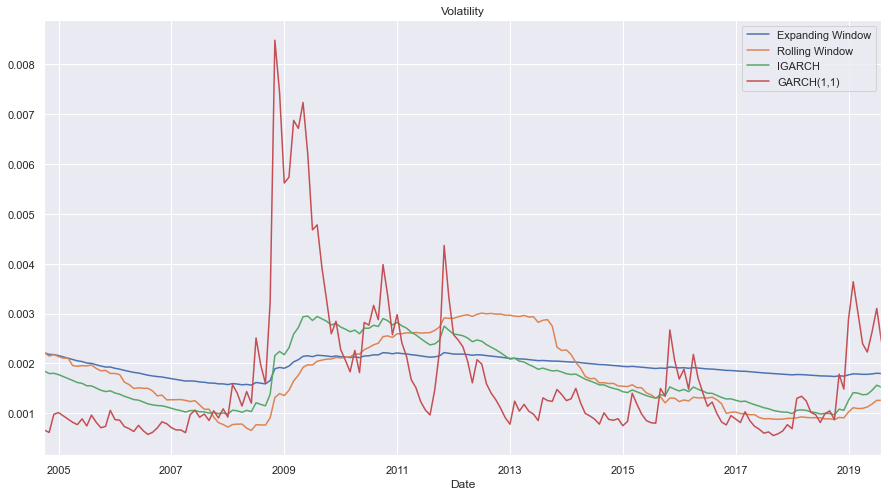

In [14]:
ax = vol.plot(figsize=(15,8), title='Volatility')

In [15]:
vol.loc["2018-10"]

,Expanding Window,Rolling Window,IGARCH,"GARCH(1,1)"
Date,,,,
2018-10-31,0.001738,0.000874,0.000969,0.000873


In [16]:
vol.loc["2018-12"]

,Expanding Window,Rolling Window,IGARCH,"GARCH(1,1)"
Date,,,,
2018-12-31,0.001745,0.000909,0.001061,0.001486
